<a href="https://colab.research.google.com/github/M-Awwab-Khan/most-comprehensive-movies-analysis/blob/main/Most_Comprehensive_Movies_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Most Comprehensive Movies Analysis

## Download Dataset from Kaggle

In [29]:
! pip install -q kaggle

In [30]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('key')
os.environ["KAGGLE_USERNAME"] = userdata.get('username')

In [31]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

the-movies-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [32]:
! unzip "the-movies-dataset.zip"

Archive:  the-movies-dataset.zip
replace credits.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Loading Required Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## CSV to Dataframe

In [80]:
movies = pd.read_csv('movies_metadata.csv')
keywords = pd.read_csv('keywords.csv')
credits = pd.read_csv('credits.csv')

<ipython-input-80-07bc07df984d>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movies_metadata.csv')


In [81]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [82]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [83]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


Before moving on, let's merge these datasets on id column

In [84]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [85]:
keywords.id = keywords.id.astype('str')
movies = movies.merge(keywords, on='id')

In [86]:
credits.id = credits.id.astype('str')
movies = movies.merge(credits, on='id')

In [87]:
movies.shape

(46628, 27)

There are total 46K+ rows and 27 Features in our dataset. Such a huge number. Now let's analyze the datatypes of different features

In [88]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46628 entries, 0 to 46627
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  46628 non-null  object 
 1   belongs_to_collection  4574 non-null   object 
 2   budget                 46628 non-null  object 
 3   genres                 46628 non-null  object 
 4   homepage               8009 non-null   object 
 5   id                     46628 non-null  object 
 6   imdb_id                46611 non-null  object 
 7   original_language      46617 non-null  object 
 8   original_title         46628 non-null  object 
 9   overview               45633 non-null  object 
 10  popularity             46624 non-null  object 
 11  poster_path            46229 non-null  object 
 12  production_companies   46624 non-null  object 
 13  production_countries   46624 non-null  object 
 14  release_date           46540 non-null  object 
 15  re

## Correcting Datatypes

Let's first of all convert release date column to pandas datetime using pd.to_datetime

In [90]:
# df['release_year'] = pd.to_datetime(df['release_date']).dt.year
movies = movies[~((movies["release_date"].str.len() < 6))]
movies['release_year'] = pd.to_datetime(movies['release_date']).dt.year

In [91]:
movies['release_year'] = movies['release_year'].astype(int, errors='ignore')

In [92]:
movies['budget'] = movies['budget'].astype(int)

In [93]:
movies['popularity'] = movies['popularity'].astype(float)

Let's analyze missing values

<Axes: >

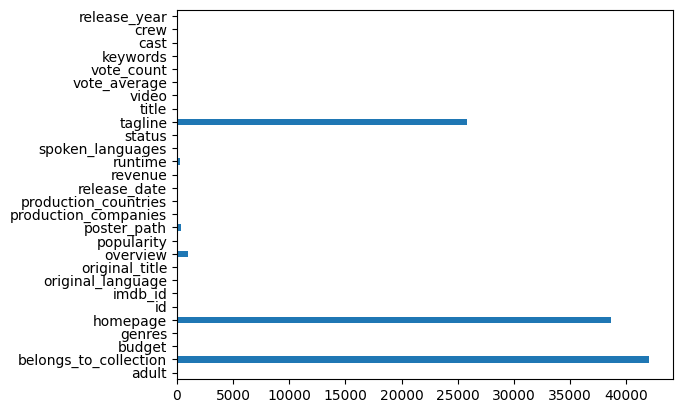

In [94]:
movies.isna().sum().plot(kind='barh')

## Handling Missing Values

Let's now remove unwanted columns from our dataset

In [95]:
columns_to_remove = ['belongs_to_collection', 'adult', 'tagline', 'homepage', 'release_date', 'video', 'spoken_languages', 'production_countries', 'imdb_id']
movies = movies.drop(columns=columns_to_remove)

<Axes: >

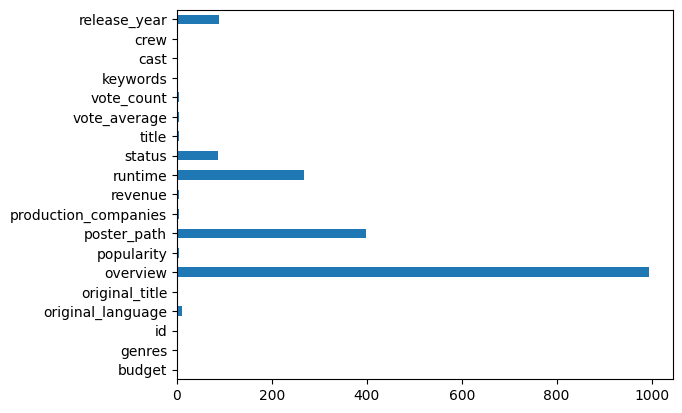

In [96]:
movies.isna().sum().plot(kind='barh')

In [97]:
import ast
def preprocess(text):
  lst = [dictionary['name'] for dictionary in ast.literal_eval(text)]
  if lst:
    return ', '.join(lst)
  return None

In [98]:
movies.genres = movies.genres.apply(preprocess)

In [99]:
movies.cast = movies.cast.apply(preprocess)

In [100]:
print(movies.iloc[0].crew)

[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'profile_path': '/v79vlRYi94BZUQnkkyznbGUZLjT.jpg'}, {'credit_id': '52fe4284c3a36847f8024f67', 'depart

In [101]:
def extract_crew(text, job):
  for dictionary in ast.literal_eval(text):
    if dictionary['job'] == job:
      return dictionary['name']
  return None

In [102]:
movies['director'] = movies['crew'].apply(lambda x: extract_crew(x, 'Director'))

In [103]:
movies['writer'] = movies['crew'].apply(lambda x: extract_crew(x, 'Screenplay'))

In [104]:
movies['producer'] = movies['crew'].apply(lambda x: extract_crew(x, 'Producer'))
movies['producer']

0              Bonnie Arnold
1               Scott Kroopf
2                       None
3                Ronald Bass
4               Nancy Meyers
                ...         
46623       Hamid Nematollah
46624                   None
46625                   None
46626    Joseph N. Ermolieff
46627                   None
Name: producer, Length: 46628, dtype: object

In [105]:
movies.drop(columns=['crew'], inplace=True)

In [107]:
movies.keywords = movies.keywords.apply(preprocess)
movies.keywords

0        jealousy, toy, boy, friendship, friends, rival...
1        board game, disappearance, based on children's...
2        fishing, best friend, duringcreditsstinger, ol...
3        based on novel, interracial relationship, sing...
4        baby, midlife crisis, confidence, aging, daugh...
                               ...                        
46623                                          tragic love
46624                                  artist, play, pinoy
46625                                                 None
46626                                                 None
46627                                                 None
Name: keywords, Length: 46628, dtype: object

In [108]:
movies = movies[~movies.production_companies.isna()]

In [109]:
movies['production_companies'] = movies['production_companies'].apply(lambda x: ast.literal_eval(x)[0]['name'] if ast.literal_eval(x) else '')

In [110]:
movies.rename(columns={'production_companines': 'production_company'}, inplace=True)

<Axes: >

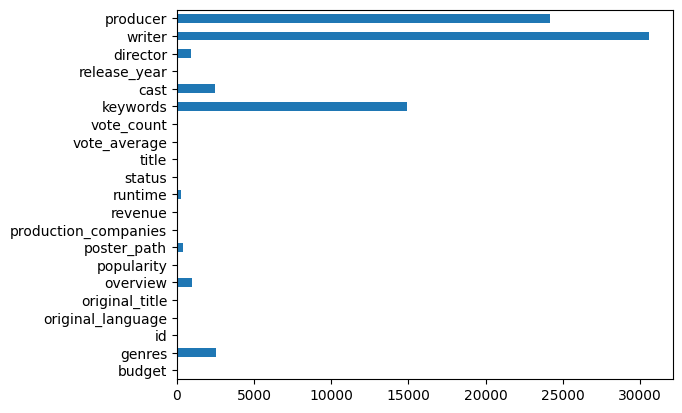

In [111]:
movies.isna().sum().plot(kind='barh')

In [112]:
movies.drop(columns=['producer', 'writer'], inplace=True)

<Axes: >

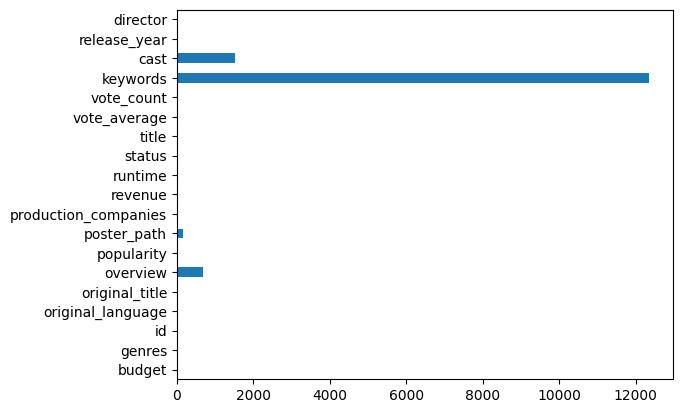

In [122]:
movies.isna().sum().plot(kind='barh')

In [ ]:
movies.genres = movies.genres.str.split(', ')

In [117]:
movies = movies[movies['release_year'].notnull()]
movies = movies[movies['director'].notnull()]
movies = movies[movies['genres'].notnull()]

In [121]:
# Step 1: Group by 'genres' and calculate the average runtime for each genre
genre_avg_runtimes = movies.groupby('genres')['runtime'].mean().reset_index()

# Step 2: Merge the average runtimes back into the original dataframe
movies = pd.merge(movies, genre_avg_runtimes, on='genres', suffixes=('', '_avg'))

# Step 3: Replace missing values in 'runtime' with the average runtime of their genre
movies['runtime'] = movies['runtime'].fillna(movies['runtime_avg'])

# Step 4: Drop the redundant 'runtime_avg' column
movies.drop(columns='runtime_avg', inplace=True)

In [128]:
movies[movies['cast'].isna()]

,budget,genres,id,original_language,original_title,overview,popularity,poster_path,production_companies,revenue,runtime,status,title,vote_average,vote_count,keywords,cast,release_year,director
5,500000,"Animation, Comedy, Family",54825,en,Creature Comforts,Interviews with the public are used to put wor...,2.329233,/x15Ridzr13YMi6RHcyVQ2s2l1Sk.jpg,Channel Four Films,0.0,5.0,Released,Creature Comforts,7.3,29.0,animation,None,1989.0,Nick Park
62,0,"Animation, Comedy, Family",245003,en,Lorenzo,"A cat, Lorenzo, is dismayed to discover that h...",1.161778,/ytgY5TJqXzer36kbGQZx4WVthxD.jpg,Walt Disney Pictures,0.0,5.0,Released,Lorenzo,6.8,14.0,"cat, animal, tail, disney short",None,2004.0,Mike Gabriel
1128,0,Comedy,125099,en,Unmade Beds,A black comedy about vanity and lust in contem...,0.037594,/zewyQhl9qyqGiXPC36fEZ5D4TEL.jpg,,0.0,95.0,Released,Unmade Beds,5.0,1.0,None,None,1997.0,Nicholas Barker
2045,0,Comedy,288413,en,The Ernest Film Festival,"Before he went to camp, before he went to jail...",0.000021,/a59Om0pYZA0ZCef8fn1iWqwqh3y.jpg,,0.0,55.0,Released,The Ernest Film Festival,0.0,0.0,None,None,1986.0,John R. Cherry III
2049,0,Comedy,288117,en,Living with the Fosters,One family's paranoid preparation for the year...,0.002361,NaN,,0.0,113.0,Released,Living with the Fosters,0.0,0.0,None,None,2002.0,Joe Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43467,0,"Science Fiction, Fantasy, Comedy",132379,xx,The '?' Motorist,A magical glowing white motorcar dismembers po...,0.398256,/vaKwT78qQ7Llw7C5nFw1LXyJcoY.jpg,Robert W. Paul,0.0,3.0,Released,The '?' Motorist,6.8,10.0,silent film,None,1906.0,Walter R. Booth
43468,0,"Horror, Fantasy, Animation",127144,en,"Don't Hug Me, I'm Scared",A singing notebook tells 3 puppets to be creat...,1.260183,/cp4VvvxleZLHlceQ8eyM7mCpP7L.jpg,This is It Collective,0.0,4.0,Released,"Don't Hug Me, I'm Scared",7.5,14.0,"rain, cloud, creativity, green, horror, satire...",None,2011.0,Joseph Pelling
43483,0,"Animation, Romance, Drama",73799,en,Tooi Sekai,"A man and a woman, talking over their relation...",0.082196,/o3U2s2uSN2Akwc9C3E8JUOdKiPa.jpg,,0.0,2.0,Released,Other Worlds,4.5,2.0,None,None,1999.0,Makoto Shinkai
43484,0,"Music, Animation, Science Fiction",10840,ja,On Your Mark ジブリ実験剧场,This animated short by Miyazaki was created as...,1.674261,/rzeek3zGw9il7fzWrZJ1FBrAQKV.jpg,Studio Ghibli,0.0,7.0,Released,On Your Mark,7.3,28.0,"musical, rescue, disappearance",None,1995.0,Hayao Miyazaki
